# Proyek Analisis Data: Air Quality (Beijing)
- Nama: Bayu Sukma
- Email: bayusukma999@gmail.com
- Id Dicoding: bayu_sukma_dfh8

## Menentukan Pertanyaan Bisnis

- Polutan apa yang paling banyak mencemari kota Beijing?
- Pada hari apa saja dalam seminggu dimana polusi udara di kota Beijing sangat tinggi?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
aotizhongzin_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Aotizhongxin.csv', index_col=False)
aotizhongzin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
changping_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Changping.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
dingling_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Dingling.csv')
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
dongsi_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Dongsi.csv')
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [6]:
guanyuan_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Guanyuan.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [7]:
gucheng_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Gucheng.csv')
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [8]:
huairou_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Huairou.csv')
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [9]:
nongzhanguan_df = pd.read_csv(r'D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Nongzhanguan.csv')
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [10]:
shunyi_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Shunyi.csv')
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [11]:
tiantan_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Tiantan.csv')
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [12]:
wanliu_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Wanliu.csv')
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [13]:
wanshouxigong_df = pd.read_csv('D:\Kuliah\Pelatihan\Dicoding\Data Analisis dengan Python\Proyek\Submission\data\Wanshouxigong.csv')
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [14]:
beijing_df = pd.concat([aotizhongzin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df])
beijing_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


`beijing_df` adalah union (gabungan) dari seluruh data yang telah diperoleh

### Assessing Data

#### menilai tabel `beijing_df`

penggabungan (union) seluruh dataframe ini dirasa perlu karena semua dataframe memiliki pemformatan yang sama, sehingga jika digabungkan akan memudahkan proses pembersihan dan analisis

In [15]:
beijing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


akibat dari proses penggabungan dataframe-dataframe ke dalam dataframe `beijing_df` mengakibatkan ketidaksesuain penomoran baris, diketahui bahwa beijing_df memiliki total 420768 baris, namun penomorannya hanya sampai 35063 baris saja

In [16]:
beijing_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [17]:
print('Jumlah duplikasi sebanyak: ', beijing_df.duplicated().sum())

Jumlah duplikasi sebanyak:  0


In [18]:
beijing_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

data yang kita peroleh memiliki banyak missing values, pada kolom:\
PM2.5   = 8739\
PM10    = 6449\
SO2     = 9021\
NO2     = 12116\
CO      = 20701\
O3      = 13277\
TEMP    = 398\
PRES    = 393\
DEWP    = 403\
RAIN    = 390\
wd      = 1822\
WSPM    = 318

Sebagai tambahan, perlu juga untuk membuat kolom baru yaitu kolom `timestamp`

### Cleaning Data

#### penamaan kolom

pembaharuan penamaan kolom untuk memudahkan proses analisis, karena terdapat kolom dengan nama `PM2.5` yang akan mengganggu proses analisis

In [19]:
beijing_df.rename(columns=({
    'PM2.5' : 'PM2_5'
}), inplace=True)

#### membuat kolom `timestamp`

In [20]:
beijing_df['timestamp'] = beijing_df['year'].astype(str) + '-' + beijing_df['month'].astype(str) + '-' + beijing_df['day'].astype(str) + ' ' + beijing_df['hour'].astype(str) + ':00:00'
beijing_df['timestamp'] = pd.to_datetime(beijing_df.timestamp)

#### penomoran

In [21]:
beijing_df.drop(columns='No', inplace=True)

In [22]:
beijing_df['No'] = (beijing_df.sort_values(ascending=True, by=['year', 'month', 'day', 'hour']).reset_index().index) + 1
beijing_df


,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp,No
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,1
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,2
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,3
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,4
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00,420764
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00,420765
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00,420766
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00,420767


In [23]:
beijing_df = beijing_df[['No', 'year', 'month', 'day', 'hour', 'timestamp', 'PM2_5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']]
beijing_df

,No,year,month,day,hour,timestamp,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,420764,2017,2,28,19,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,420765,2017,2,28,20,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,420766,2017,2,28,21,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,420767,2017,2,28,22,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [24]:
beijing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   No         420768 non-null  int64         
 1   year       420768 non-null  int64         
 2   month      420768 non-null  int64         
 3   day        420768 non-null  int64         
 4   hour       420768 non-null  int64         
 5   timestamp  420768 non-null  datetime64[ns]
 6   PM2_5      412029 non-null  float64       
 7   PM10       414319 non-null  float64       
 8   SO2        411747 non-null  float64       
 9   NO2        408652 non-null  float64       
 10  CO         400067 non-null  float64       
 11  O3         407491 non-null  float64       
 12  TEMP       420370 non-null  float64       
 13  PRES       420375 non-null  float64       
 14  DEWP       420365 non-null  float64       
 15  RAIN       420378 non-null  float64       
 16  wd         418946 non

#### missing values

In [25]:
beijing_df.describe()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,210384.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,121465.403371,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,105192.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,210384.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,315576.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,420768.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [26]:
beijing_df.isnull().sum()

No               0
year             0
month            0
day              0
hour             0
timestamp        0
PM2_5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
dtype: int64

##### kolom `PM2_5`

In [27]:
beijing_df[beijing_df.PM2_5.isnull()]

,No,year,month,day,hour,timestamp,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,2013-05-02 21:00:00,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,2013-05-16 13:00:00,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,2013-06-07 16:00:00,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,2013-06-25 01:00:00,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,2013-06-26 00:00:00,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34992,420697,2017,2,26,0,2017-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1020.7,-8.6,0.0,NNE,1.0,Wanshouxigong
35005,420710,2017,2,26,13,2017-02-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
35027,420732,2017,2,27,11,2017-02-27 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
35028,420733,2017,2,27,12,2017-02-27 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


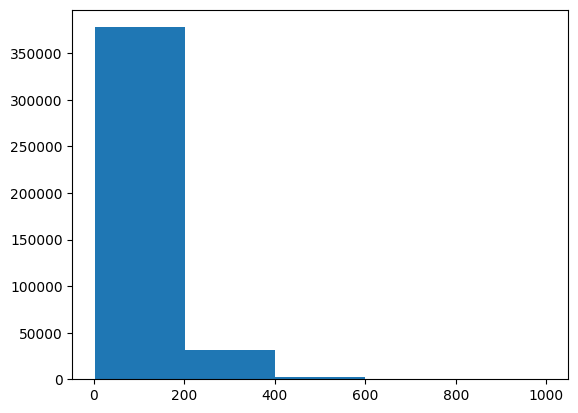

In [28]:
plt.hist(x='PM2_5', bins=5, data=beijing_df)
plt.show()

In [29]:
beijing_df.PM2_5.fillna(value=beijing_df.PM2_5.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1858145297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.PM2_5.fillna(value=beijing_df.PM2_5.mean(), inplace=True)


##### kolom `PM10`

In [30]:
beijing_df.PM10.fillna(value=beijing_df.PM10.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\3668787348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.PM10.fillna(value=beijing_df.PM10.mean(), inplace=True)


##### kolom `SO2`

In [31]:
beijing_df.SO2.fillna(value=beijing_df.SO2.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\3392423277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.SO2.fillna(value=beijing_df.SO2.mean(), inplace=True)


##### kolom `NO2`

In [32]:
beijing_df.NO2.fillna(value=beijing_df.NO2.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1205979715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.NO2.fillna(value=beijing_df.NO2.mean(), inplace=True)


##### kolom `CO`

In [33]:
beijing_df.CO.fillna(value=beijing_df.CO.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1167070455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.CO.fillna(value=beijing_df.CO.mean(), inplace=True)


##### kolom `O3`

In [34]:
beijing_df.O3.fillna(value=beijing_df.O3.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1323066052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.O3.fillna(value=beijing_df.O3.mean(), inplace=True)


##### kolom `TEMP`

In [35]:
beijing_df.TEMP.fillna(value=beijing_df.TEMP.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1219042562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.TEMP.fillna(value=beijing_df.TEMP.mean(), inplace=True)


##### kolom `PRES`

In [36]:
beijing_df.PRES.fillna(value=beijing_df.PRES.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1306279364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.PRES.fillna(value=beijing_df.PRES.mean(), inplace=True)


##### kolom `DEWP`

In [37]:
beijing_df.DEWP.fillna(value=beijing_df.DEWP.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\2940556534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.DEWP.fillna(value=beijing_df.DEWP.mean(), inplace=True)


##### kolom `RAIN`

In [38]:
beijing_df.RAIN.fillna(value=beijing_df.RAIN.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\2079082910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.RAIN.fillna(value=beijing_df.RAIN.mean(), inplace=True)


##### kolom `wd`

In [39]:
beijing_df.wd.value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

In [40]:
beijing_df.wd.fillna(value='NE', inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\792756009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.wd.fillna(value='NE', inplace=True)


##### kolom `WSPM`

In [41]:
beijing_df.WSPM.fillna(value=beijing_df.WSPM.mean(), inplace=True)

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\2399667557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df.WSPM.fillna(value=beijing_df.WSPM.mean(), inplace=True)


In [42]:
beijing_df.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
timestamp    0
PM2_5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
dtype: int64

Missing value telah ditangani

## Exploratory Data Analysis (EDA)

### Explore `beijing_df`

In [43]:
beijing_df.describe()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,210384.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,121465.403371,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,1.245914
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,105192.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,210384.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,315576.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,420768.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [44]:
beijing_df.corr()

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\3156475704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  beijing_df.corr()


,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,8.079443e-02,3.598376e-03,1.480368e-03,5.698902e-05,0.028521,0.027448,-0.006373,0.082628,0.048284,-0.039324,-0.013129,0.088311,0.005063,0.001009,-0.016903
year,0.080794,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.025605,-0.037475,-0.168632,-0.055590,0.007555,-0.023968,-0.151670,0.186519,-0.164686,0.000975,0.087429
month,0.003598,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.010341,-0.025185,-0.211783,0.041690,0.045478,-0.101881,0.131213,-0.012784,0.265549,0.016052,-0.139573
day,0.001480,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.003391,0.025798,-0.005085,0.009725,-0.015321,0.002784,0.014385,0.021749,0.023061,-0.003697,-0.011642
hour,0.000057,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011606,0.051073,0.029626,-0.001538,-0.030604,0.277640,0.141924,-0.038351,-0.012211,0.012376,0.140437
PM2_5,0.028521,-2.560478e-02,1.034053e-02,3.390902e-03,1.160579e-02,1.000000,0.879389,0.477582,0.658108,0.768664,-0.147204,-0.129715,0.018357,0.113499,-0.014156,-0.269023
PM10,0.027448,-3.747533e-02,-2.518507e-02,2.579828e-02,5.107307e-02,0.879389,1.000000,0.458519,0.645448,0.686716,-0.109983,-0.095395,-0.017806,0.069767,-0.026360,-0.181835
SO2,-0.006373,-1.686324e-01,-2.117831e-01,-5.085191e-03,2.962574e-02,0.477582,0.458519,1.000000,0.491109,0.524707,-0.162283,-0.318067,0.220414,-0.263895,-0.040029,-0.107549
NO2,0.082628,-5.558991e-02,4.169005e-02,9.725404e-03,-1.538160e-03,0.658108,0.645448,0.491109,1.000000,0.688207,-0.463523,-0.273864,0.171262,-0.031135,-0.043357,-0.393849
CO,0.048284,7.554741e-03,4.547757e-02,-1.532101e-02,-3.060377e-02,0.768664,0.686716,0.524707,0.688207,1.000000,-0.305255,-0.317872,0.183004,-0.055615,-0.013008,-0.290044


In [45]:
beijing_df

,No,year,month,day,hour,timestamp,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,420764,2017,2,28,19,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,420765,2017,2,28,20,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,420766,2017,2,28,21,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,420767,2017,2,28,22,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [46]:
pollutan_index_df = beijing_df.groupby(by=['year', 'month', 'day']).agg({
    'PM2_5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO': 'mean',
    'O3' : 'mean'
}).reset_index()
pollutan_index_df['date'] = pollutan_index_df['year'].astype(str) + '-' + pollutan_index_df['month'].astype(str) + '-' + pollutan_index_df['day'].astype(str)
pollutan_index_df.drop(columns=['year', 'month', 'day'], inplace= True)
pollutan_index_df['date'] = pd.to_datetime(pollutan_index_df.date)
pollutan_index_df['date'] = pollutan_index_df['date'].dt.strftime('%Y/%m/%d')
pollutan_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2_5   1461 non-null   float64
 1   PM10    1461 non-null   float64
 2   SO2     1461 non-null   float64
 3   NO2     1461 non-null   float64
 4   CO      1461 non-null   float64
 5   O3      1461 non-null   float64
 6   date    1461 non-null   object 
dtypes: float64(6), object(1)
memory usage: 80.0+ KB


In [47]:
pollutan_index_df['date'] = pd.to_datetime(pollutan_index_df.date)
pollutan_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM2_5   1461 non-null   float64       
 1   PM10    1461 non-null   float64       
 2   SO2     1461 non-null   float64       
 3   NO2     1461 non-null   float64       
 4   CO      1461 non-null   float64       
 5   O3      1461 non-null   float64       
 6   date    1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [48]:
pollutan_index_df

,PM2_5,PM10,SO2,NO2,CO,O3,date
0,7.326389,12.896546,9.416615,25.871867,423.904857,68.254283,2013-03-01
1,31.475694,40.838898,31.783306,56.599572,953.270251,32.664905,2013-03-02
2,79.291667,111.104167,49.270246,76.288572,1771.422800,22.788194,2013-03-03
3,22.739469,41.045852,18.795535,43.629349,731.415045,56.833333,2013-03-04
4,129.331557,159.236111,70.177031,100.719212,2024.552540,79.527778,2013-03-05
...,...,...,...,...,...,...,...
1456,25.665232,38.931268,9.578686,44.781627,720.352545,46.162713,2017-02-24
1457,12.579747,23.024351,5.767896,30.754142,482.825806,58.992574,2017-02-25
1458,28.327709,45.686833,10.081571,50.464985,708.653817,42.589796,2017-02-26
1459,67.796720,97.724496,16.510796,74.123915,1323.984821,28.991536,2017-02-27


Nilai rata-rata per polutannya merupakan nilai rata-rata dalam satu hari dan rata-rata dari seluruh stasiun

Air Quality Index (AQI):\
0 - 50 (Excellent)\
51 - 100 (Good)\
101 - 150 (Lightly Polluted)\
151 - 200 (Moderately Polluted)\
201 - 300 (Heavly Polluted)\
More than 300 (Severely Polluted)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Polutan apa yang paling banyak mencemari kota Beijing?


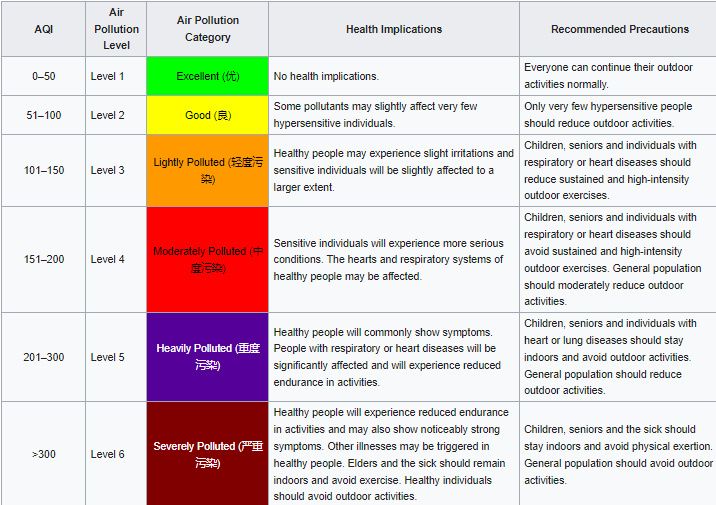
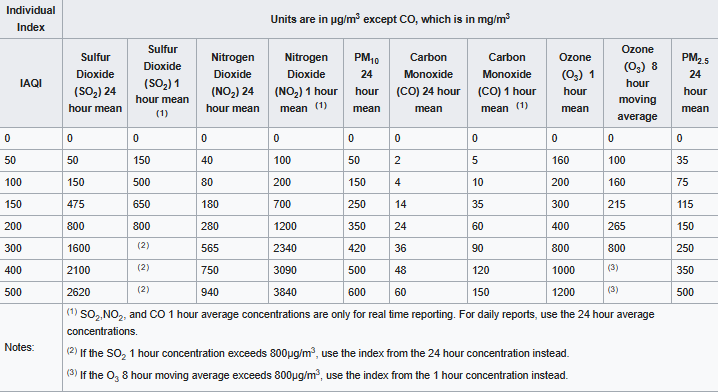

In [49]:
# memberikan indeks kualitas udara berdasarkan polutannya

PM2_5_index = []
for row in pollutan_index_df['PM2_5']:
        if 0 < row <= 35 :    PM2_5_index.append('Excellent')
        elif 35 < row <= 75 :   PM2_5_index.append('Good')
        elif 75 < row <= 115 :  PM2_5_index.append('Lightly Polluted')
        elif 115 < row <= 150 :  PM2_5_index.append('Moderately Polluted')
        elif 150 < row <= 250:  PM2_5_index.append('Heavely Polluted')
        
        else:
                PM2_5_index.append('Severely Polluted')
pollutan_index_df['PM2_5_index'] = PM2_5_index

#_____________________________________________________________
PM10_index = []
for row in pollutan_index_df['PM10']:
        if 0 < row <= 50 :    PM10_index.append('Excellent')
        elif 50 < row <= 150 :   PM10_index.append('Good')
        elif 150 < row <= 250 :  PM10_index.append('Lightly Polluted')
        elif 250 < row <= 350 :  PM10_index.append('Moderately Polluted')
        elif 350 < row <= 420:  PM10_index.append('Heavely Polluted')
        
        else:
                PM10_index.append('Severely Polluted')
pollutan_index_df['PM10_index'] = PM10_index

#_____________________________________________________________
SO2_index = []
for row in pollutan_index_df['SO2']:
        if 0 < row <= 50 :    SO2_index.append('Excellent')
        elif 50 < row <= 150 :   SO2_index.append('Good')
        elif 150 < row <= 475 :  SO2_index.append('Lightly Polluted')
        elif 475 < row <= 800 :  SO2_index.append('Moderately Polluted')
        elif 800 < row <= 1600:  SO2_index.append('Heavely Polluted')
        
        else:
                SO2_index.append('Severely Polluted')
pollutan_index_df['SO2_index'] = SO2_index

#_____________________________________________________________
NO2_index = []
for row in pollutan_index_df['NO2']:
        if 0 < row <= 40 :    NO2_index.append('Excellent')
        elif 40 < row <= 80 :   NO2_index.append('Good')
        elif 80 < row <= 180 :  NO2_index.append('Lightly Polluted')
        elif 180 < row <= 280 :  NO2_index.append('Moderately Polluted')
        elif 280 < row <= 585:  NO2_index.append('Heavely Polluted')
        
        else:
                NO2_index.append('Severely Polluted')
pollutan_index_df['NO2_index'] = NO2_index

#_____________________________________________________________
CO_index = []
for row in pollutan_index_df['CO']:
        if 0 < row <= 2000 :    CO_index.append('Excellent')
        elif 2000 < row <= 4000 :   CO_index.append('Good')
        elif 4000 < row <= 14000 :  CO_index.append('Lightly Polluted')
        elif 14000 < row <= 24000 :  CO_index.append('Moderately Polluted')
        elif 24000 < row <= 36000 :  CO_index.append('Heavely Polluted')
        
        else:
                CO_index.append('Severely Polluted')
pollutan_index_df['CO_index'] = CO_index

#_____________________________________________________________
O3_index = []
for row in pollutan_index_df['O3']:
        if 0 < row <= 100 :    O3_index.append('Excellent')
        elif 100 < row <= 160 :   O3_index.append('Good')
        elif 160 < row <= 215 :  O3_index.append('Lightly Polluted')
        elif 215 < row <= 265 :  O3_index.append('Moderately Polluted')
        elif 265 < row <= 800:  O3_index.append('Heavely Polluted')
        
        else:
                O3_index.append('Severely Polluted')
pollutan_index_df['O3_index'] = O3_index


pollutan_index_df

,PM2_5,PM10,SO2,NO2,CO,O3,date,PM2_5_index,PM10_index,SO2_index,NO2_index,CO_index,O3_index
0,7.326389,12.896546,9.416615,25.871867,423.904857,68.254283,2013-03-01,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
1,31.475694,40.838898,31.783306,56.599572,953.270251,32.664905,2013-03-02,Excellent,Excellent,Excellent,Good,Excellent,Excellent
2,79.291667,111.104167,49.270246,76.288572,1771.422800,22.788194,2013-03-03,Lightly Polluted,Good,Excellent,Good,Excellent,Excellent
3,22.739469,41.045852,18.795535,43.629349,731.415045,56.833333,2013-03-04,Excellent,Excellent,Excellent,Good,Excellent,Excellent
4,129.331557,159.236111,70.177031,100.719212,2024.552540,79.527778,2013-03-05,Moderately Polluted,Lightly Polluted,Good,Lightly Polluted,Good,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,25.665232,38.931268,9.578686,44.781627,720.352545,46.162713,2017-02-24,Excellent,Excellent,Excellent,Good,Excellent,Excellent
1457,12.579747,23.024351,5.767896,30.754142,482.825806,58.992574,2017-02-25,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
1458,28.327709,45.686833,10.081571,50.464985,708.653817,42.589796,2017-02-26,Excellent,Excellent,Excellent,Good,Excellent,Excellent
1459,67.796720,97.724496,16.510796,74.123915,1323.984821,28.991536,2017-02-27,Good,Good,Excellent,Good,Excellent,Excellent


In [50]:
pollutan_index_df = pollutan_index_df[['date', 'PM2_5', 'PM2_5_index',	'PM10', 'PM10_index', 'SO2', 'SO2_index', 'NO2', 'NO2_index', 'CO', 'CO_index', 'O3', 'O3_index']]
pollutan_index_df.head()

,date,PM2_5,PM2_5_index,PM10,PM10_index,SO2,SO2_index,NO2,NO2_index,CO,CO_index,O3,O3_index
0,2013-03-01,7.326389,Excellent,12.896546,Excellent,9.416615,Excellent,25.871867,Excellent,423.904857,Excellent,68.254283,Excellent
1,2013-03-02,31.475694,Excellent,40.838898,Excellent,31.783306,Excellent,56.599572,Good,953.270251,Excellent,32.664905,Excellent
2,2013-03-03,79.291667,Lightly Polluted,111.104167,Good,49.270246,Excellent,76.288572,Good,1771.422800,Excellent,22.788194,Excellent
3,2013-03-04,22.739469,Excellent,41.045852,Excellent,18.795535,Excellent,43.629349,Good,731.415045,Excellent,56.833333,Excellent
4,2013-03-05,129.331557,Moderately Polluted,159.236111,Lightly Polluted,70.177031,Good,100.719212,Lightly Polluted,2024.552540,Good,79.527778,Excellent


In [51]:
pollutan_index_df.tail(7)

,date,PM2_5,PM2_5_index,PM10,PM10_index,SO2,SO2_index,NO2,NO2_index,CO,CO_index,O3,O3_index
1454,2017-02-22,78.415607,Lightly Polluted,79.782054,Good,7.005666,Excellent,41.671186,Good,1029.273369,Excellent,42.010265,Excellent
1455,2017-02-23,18.330464,Excellent,28.582666,Excellent,6.919499,Excellent,31.711890,Excellent,574.706129,Excellent,60.732157,Excellent
1456,2017-02-24,25.665232,Excellent,38.931268,Excellent,9.578686,Excellent,44.781627,Good,720.352545,Excellent,46.162713,Excellent
1457,2017-02-25,12.579747,Excellent,23.024351,Excellent,5.767896,Excellent,30.754142,Excellent,482.825806,Excellent,58.992574,Excellent
1458,2017-02-26,28.327709,Excellent,45.686833,Excellent,10.081571,Excellent,50.464985,Good,708.653817,Excellent,42.589796,Excellent
1459,2017-02-27,67.796720,Good,97.724496,Good,16.510796,Excellent,74.123915,Good,1323.984821,Excellent,28.991536,Excellent
1460,2017-02-28,17.422666,Excellent,31.220221,Excellent,6.904971,Excellent,33.572709,Excellent,550.453925,Excellent,59.779806,Excellent


In [52]:
pollutan_index_df.head()

,date,PM2_5,PM2_5_index,PM10,PM10_index,SO2,SO2_index,NO2,NO2_index,CO,CO_index,O3,O3_index
0,2013-03-01,7.326389,Excellent,12.896546,Excellent,9.416615,Excellent,25.871867,Excellent,423.904857,Excellent,68.254283,Excellent
1,2013-03-02,31.475694,Excellent,40.838898,Excellent,31.783306,Excellent,56.599572,Good,953.270251,Excellent,32.664905,Excellent
2,2013-03-03,79.291667,Lightly Polluted,111.104167,Good,49.270246,Excellent,76.288572,Good,1771.422800,Excellent,22.788194,Excellent
3,2013-03-04,22.739469,Excellent,41.045852,Excellent,18.795535,Excellent,43.629349,Good,731.415045,Excellent,56.833333,Excellent
4,2013-03-05,129.331557,Moderately Polluted,159.236111,Lightly Polluted,70.177031,Good,100.719212,Lightly Polluted,2024.552540,Good,79.527778,Excellent


In [53]:
PM2_5_isum = pollutan_index_df.groupby(by = 'PM2_5_index').agg({
    'PM2_5' : 'nunique'
}).reset_index()
PM2_5_isum.rename(columns={
    'PM2_5_index' : 'pollutan_index',
    'PM2_5' : 'days_count'}, inplace = True)

PM10_isum = pollutan_index_df.groupby(by = 'PM10_index').agg({
    'PM10' : 'nunique'
}).reset_index()
PM10_isum.rename(columns={
    'PM10_index' : 'pollutan_index',
    'PM10' : 'days_count'}, inplace = True)

NO2_isum = pollutan_index_df.groupby(by = 'NO2_index').agg({
    'NO2' : 'nunique'
}).reset_index()
NO2_isum.rename(columns={
    'NO2_index' : 'pollutan_index',
    'NO2' : 'days_count'}, inplace = True)

SO2_isum = pollutan_index_df.groupby(by = 'SO2_index').agg({
    'SO2' : 'nunique'
}).reset_index()
SO2_isum.rename(columns={
    'SO2_index' : 'pollutan_index',
    'SO2' : 'days_count'}, inplace = True)

CO_isum = pollutan_index_df.groupby(by = 'CO_index').agg({
    'CO' : 'nunique'
}).reset_index()
CO_isum.rename(columns={
    'CO_index' : 'pollutan_index',
    'CO' : 'days_count'}, inplace = True)

O3_isum = pollutan_index_df.groupby(by = 'O3_index').agg({
    'O3' : 'nunique'
}).reset_index()
O3_isum.rename(columns={
    'O3_index' : 'pollutan_index',
    'O3' : 'days_count'}, inplace = True)


In [54]:
PM2_5_isum['pollutan'] = 'PM2.5'
PM10_isum['pollutan'] = 'PM10'
NO2_isum['pollutan'] = 'NO2'
SO2_isum['pollutan'] = 'SO2'
CO_isum['pollutan'] = 'CO'
O3_isum['pollutan'] = 'O3'

pollutan_isum = pd.concat([PM2_5_isum, PM10_isum, NO2_isum, SO2_isum, CO_isum, O3_isum])
pollutan_isum.head(1)

,pollutan_index,days_count,pollutan
0,Excellent,396,PM2.5


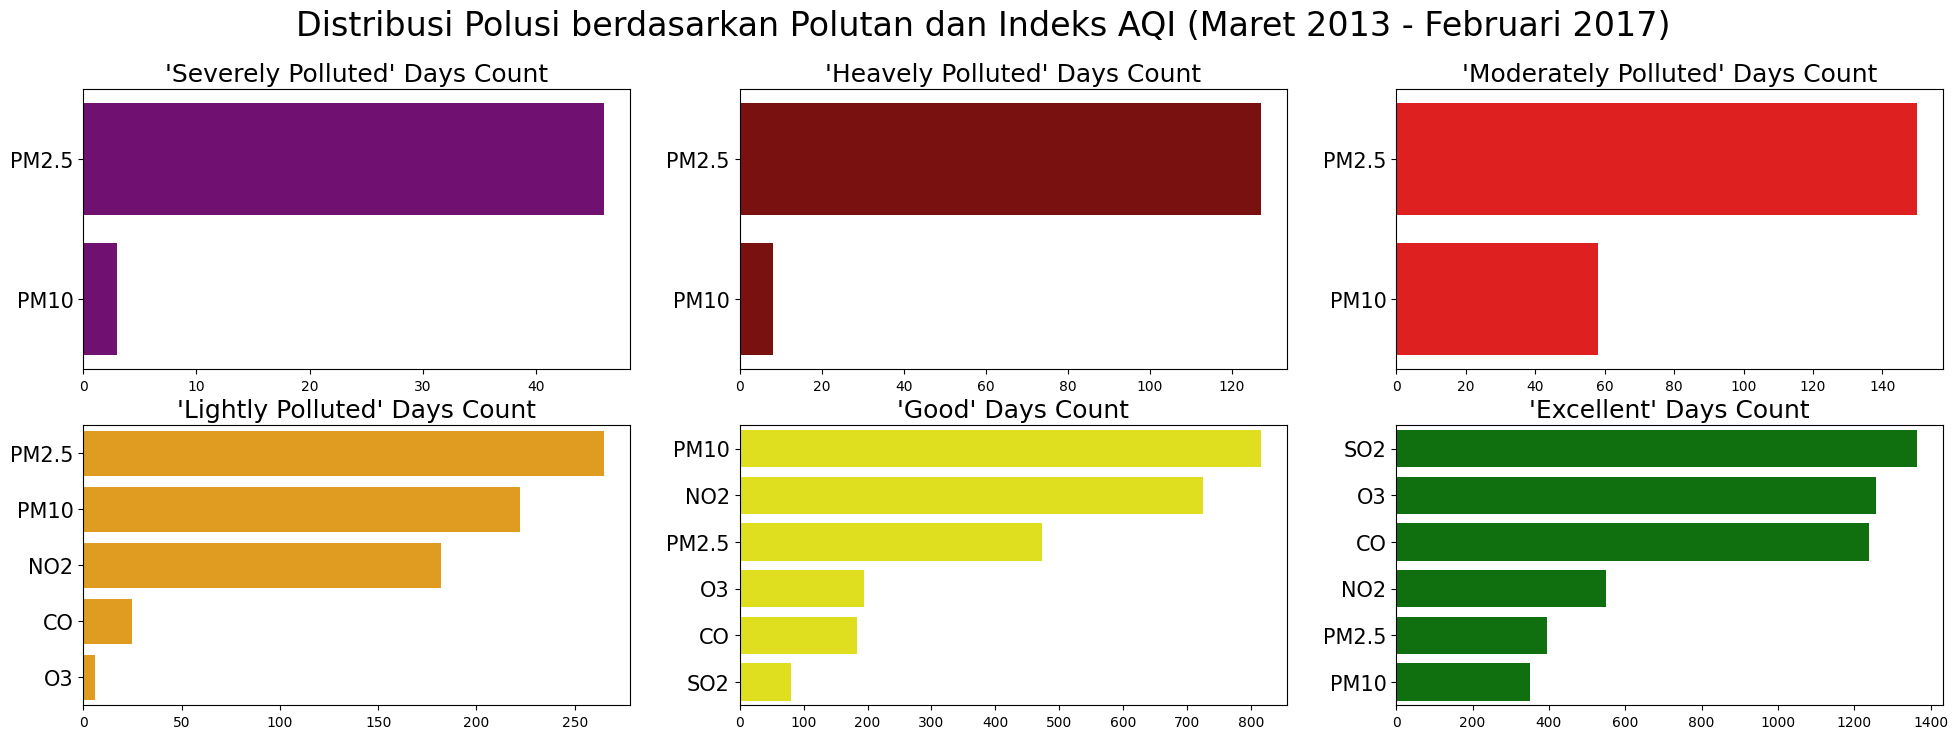

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Severely Polluted'].sort_values(by = 'days_count', ascending = False), color = 'purple', ax=ax[0, 0])
ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title("'Severely Polluted' Days Count", loc="center", fontsize=18)
ax[0, 0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Heavely Polluted'].sort_values(by = 'days_count', ascending = False), color = 'darkred', ax=ax[0, 1])
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title("'Heavely Polluted' Days Count", loc="center", fontsize=18)
ax[0, 1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Moderately Polluted'].sort_values(by = 'days_count', ascending = False), color = 'red', ax=ax[0, 2])
ax[0, 2].set_ylabel(None)
ax[0, 2].set_xlabel(None)
ax[0, 2].set_title("'Moderately Polluted' Days Count", loc="center", fontsize=18)
ax[0, 2].tick_params(axis ='y', labelsize=15)

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Lightly Polluted'].sort_values(by = 'days_count', ascending = False), color = 'orange', ax=ax[1, 0])
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title("'Lightly Polluted' Days Count", loc="center", fontsize=18)
ax[1, 0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Good'].sort_values(by = 'days_count', ascending = False), color = 'yellow', ax=ax[1, 1])
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_title("'Good' Days Count", loc="center", fontsize=18)
ax[1, 1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="days_count", y="pollutan", data = pollutan_isum[pollutan_isum.pollutan_index == 'Excellent'].sort_values(by = 'days_count', ascending = False), color = 'green', ax=ax[1, 2])
ax[1, 2].set_ylabel(None)
ax[1, 2].set_xlabel(None)
ax[1, 2].set_title("'Excellent' Days Count", loc="center", fontsize=18)
ax[1, 2].tick_params(axis ='y', labelsize=15)

plt.suptitle('Distribusi Polusi berdasarkan Polutan dan Indeks AQI (Maret 2013 - Februari 2017)', fontsize = 24)
plt.show()


### Pertanyaan 2: Pada hari apa saja dalam seminggu dimana polusi di kota beijing sangat tinggi?

In [56]:
pollutan_index_df['date'] = pollutan_index_df['date'].dt.strftime('%Y/%m/%d')

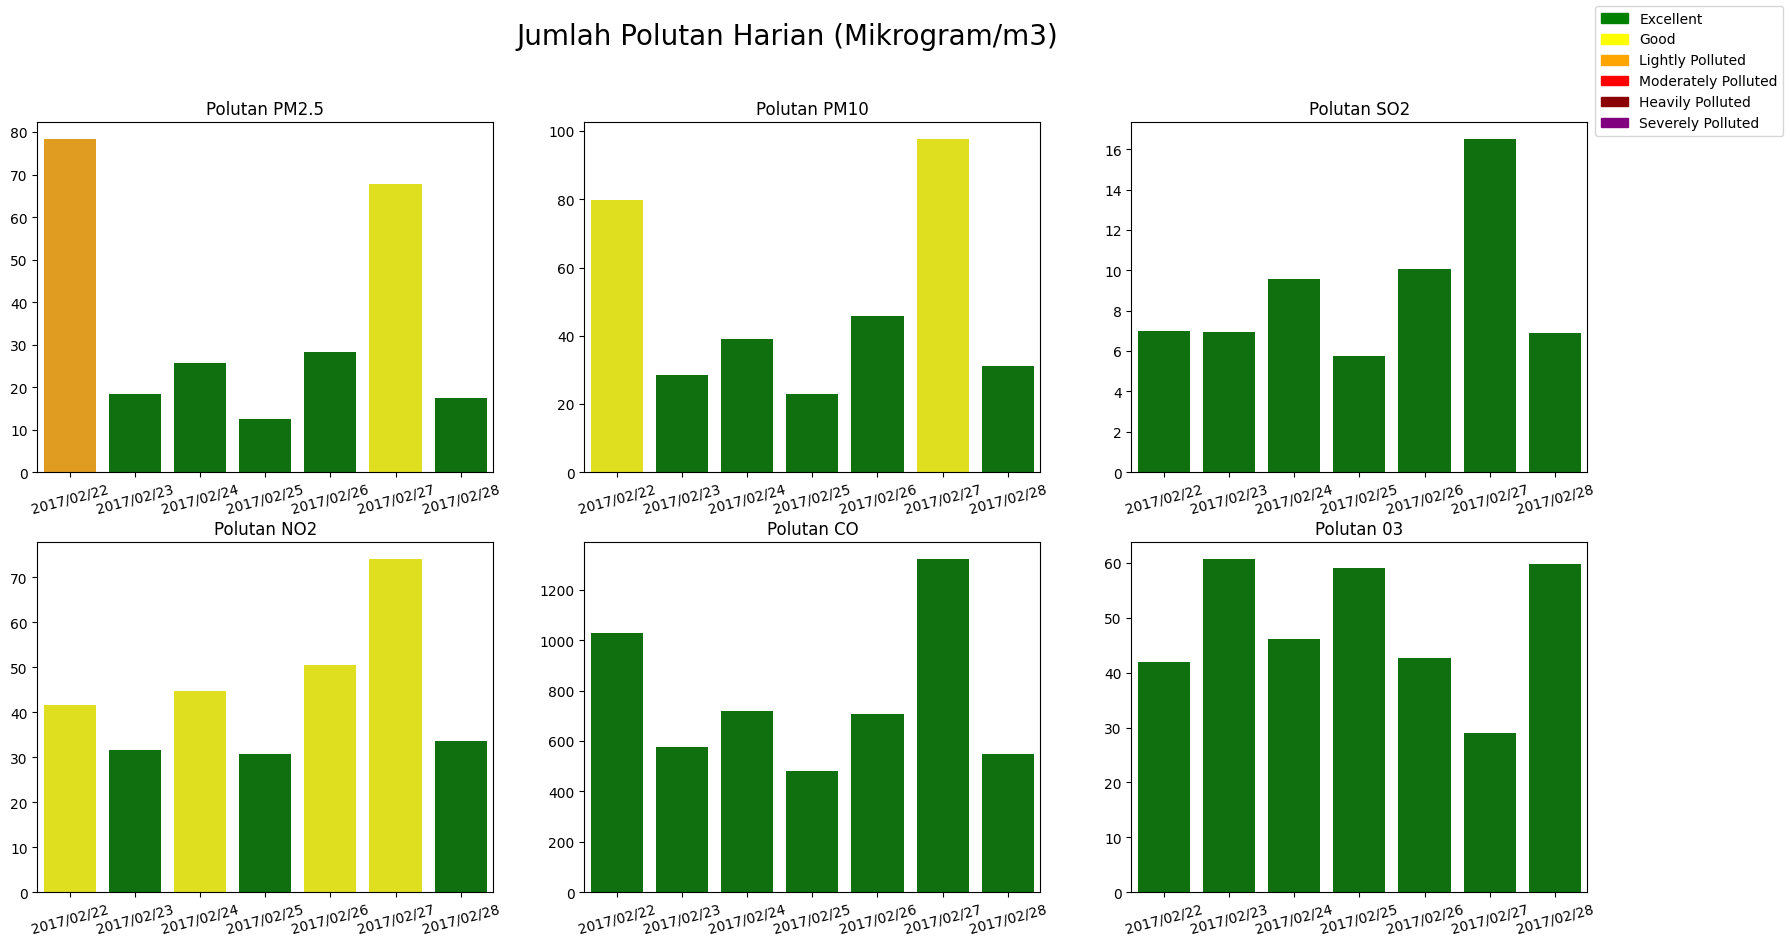

In [57]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10))


color_PM2_5 = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.PM2_5_index.tail(7)]
color_PM10 = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.PM10_index.tail(7)]
color_SO2 = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.SO2_index.tail(7)]
color_NO2 = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.NO2_index.tail(7)]
color_CO = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.CO_index.tail(7)]
color_O3 = ['green' if x == 'Excellent' else(
    'yellow' if x == 'Good' else(
        'orange' if x == 'Lightly Polluted' else(
            'red' if x == 'Moderately Polluted' else(
                'darkred' if x == 'Heavely Polluted' else 'purple')))) for x in pollutan_index_df.O3_index.tail(7)]


sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['PM2_5'],
    data = pollutan_index_df,
    ax = ax[0, 0],
    palette = color_PM2_5
)

ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title('Polutan PM2.5')
ax[0, 0].xaxis.set_tick_params(rotation=15)

sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['PM10'],
    data = pollutan_index_df,
    palette = color_PM10,
    ax = ax[0, 1]
)
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title('Polutan PM10')
ax[0, 1].xaxis.set_tick_params(rotation=15)

sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['SO2'],
    data = pollutan_index_df,
    palette = color_SO2,
    ax = ax[0, 2]
)
ax[0, 2].set_ylabel(None)
ax[0, 2].set_xlabel(None)
ax[0, 2].set_title('Polutan SO2')
ax[0, 2].xaxis.set_tick_params(rotation=15)

sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['NO2'],
    data = pollutan_index_df,
    palette = color_NO2,
    ax = ax[1, 0]
)
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title('Polutan NO2')
ax[1, 0].xaxis.set_tick_params(rotation=15)

sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['CO'],
    data = pollutan_index_df,
    palette = color_CO,
    ax = ax[1, 1]
)
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_title('Polutan CO')
ax[1, 1].xaxis.set_tick_params(rotation=15)

sns.barplot(
    x = pollutan_index_df['date'].tail(7),
    y = pollutan_index_df['O3'],
    data = pollutan_index_df,
    palette = color_O3,
    ax = ax[1, 2]
)
ax[1, 2].set_ylabel(None)
ax[1, 2].set_xlabel(None)
ax[1, 2].set_title('Polutan 03')
ax[1, 2].xaxis.set_tick_params(rotation=15)

colors = ['green', 'yellow', 'orange', 'red', 'darkred', 'purple']
labels = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted', 'Severely Polluted']
legenda = [mpatches.Patch(color = colors[i], label = "{:s}".format(labels[i])) for i in range(len(labels))]

plt.suptitle('Jumlah Polutan Harian (Mikrogram/m3)' , fontsize = 20)
fig.legend(handles = legenda, loc = 'upper right')
plt.show()

In [58]:
pollutan_index_df['date'] = pd.to_datetime(pollutan_index_df.date)

In [59]:
pollutan_index_df['date'] = pollutan_index_df['date'].dt.strftime('%A')
pollutan_index_df

,date,PM2_5,PM2_5_index,PM10,PM10_index,SO2,SO2_index,NO2,NO2_index,CO,CO_index,O3,O3_index
0,Friday,7.326389,Excellent,12.896546,Excellent,9.416615,Excellent,25.871867,Excellent,423.904857,Excellent,68.254283,Excellent
1,Saturday,31.475694,Excellent,40.838898,Excellent,31.783306,Excellent,56.599572,Good,953.270251,Excellent,32.664905,Excellent
2,Sunday,79.291667,Lightly Polluted,111.104167,Good,49.270246,Excellent,76.288572,Good,1771.422800,Excellent,22.788194,Excellent
3,Monday,22.739469,Excellent,41.045852,Excellent,18.795535,Excellent,43.629349,Good,731.415045,Excellent,56.833333,Excellent
4,Tuesday,129.331557,Moderately Polluted,159.236111,Lightly Polluted,70.177031,Good,100.719212,Lightly Polluted,2024.552540,Good,79.527778,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,Friday,25.665232,Excellent,38.931268,Excellent,9.578686,Excellent,44.781627,Good,720.352545,Excellent,46.162713,Excellent
1457,Saturday,12.579747,Excellent,23.024351,Excellent,5.767896,Excellent,30.754142,Excellent,482.825806,Excellent,58.992574,Excellent
1458,Sunday,28.327709,Excellent,45.686833,Excellent,10.081571,Excellent,50.464985,Good,708.653817,Excellent,42.589796,Excellent
1459,Monday,67.796720,Good,97.724496,Good,16.510796,Excellent,74.123915,Good,1323.984821,Excellent,28.991536,Excellent


In [66]:
weeks_df = pd.concat([pollutan_index_df.groupby(by = ['date', 'PM2_5_index']).agg({'PM2_5' : 'nunique'}).rename(columns={'PM2_5_index' : 'pollutan_index', 'PM2_5' : 'pollutan'}),
                      pollutan_index_df.groupby(by = ['date', 'NO2_index']).agg({'NO2' : 'nunique'}).rename(columns={'NO2_index' : 'pollutan_index', 'NO2' : 'pollutan'}),
                      pollutan_index_df.groupby(by = ['date', 'SO2_index']).agg({'SO2' : 'nunique'}).rename(columns={'SO2_index' : 'pollutan_index', 'SO2' : 'pollutan'}),
                      pollutan_index_df.groupby(by = ['date', 'CO_index']).agg({'CO' : 'nunique'}).rename(columns={'CO_index' : 'pollutan_index', 'CO' : 'pollutan'}),
                      pollutan_index_df.groupby(by = ['date', 'O3_index']).agg({'O3' : 'nunique'}).rename(columns={'O3_index' : 'pollutan_index', 'O3' : 'pollutan'}),
                      pollutan_index_df.groupby(by = ['date', 'PM10_index']).agg({'PM10' : 'nunique'}).rename(columns={'PM10_index' : 'pollutan_index', 'PM10' : 'pollutan'})]).reset_index().rename(columns={
    'date':'day',
    'PM2_5_index':'pollutan_index',
    'pollutan':'polluted_days_count'})

weeks_df = weeks_df.groupby(by=['day', 'pollutan_index']).agg({'polluted_days_count':'sum'}).reset_index()


In [67]:
weeks_df['day'] = pd.Categorical(weeks_df['day'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [68]:
weeks_df.sort_values(by='day')

,day,pollutan_index,polluted_days_count
20,Sunday,Heavely Polluted,25
19,Sunday,Good,368
18,Sunday,Excellent,730
23,Sunday,Severely Polluted,6
22,Sunday,Moderately Polluted,22
21,Sunday,Lightly Polluted,103
6,Monday,Excellent,771
7,Monday,Good,344
8,Monday,Heavely Polluted,18
9,Monday,Lightly Polluted,94


In [69]:
d1_df = weeks_df[weeks_df.pollutan_index != 'Good']
d2_df = d1_df[weeks_df.pollutan_index != 'Excellent']
d3_df = d2_df[weeks_df.pollutan_index != 'Lightly Polluted']
weeks_fix_df = d3_df

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\2972746179.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d2_df = d1_df[weeks_df.pollutan_index != 'Excellent']
C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\2972746179.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d3_df = d2_df[weeks_df.pollutan_index != 'Lightly Polluted']


<Axes: xlabel='day', ylabel='polluted_days_count'>

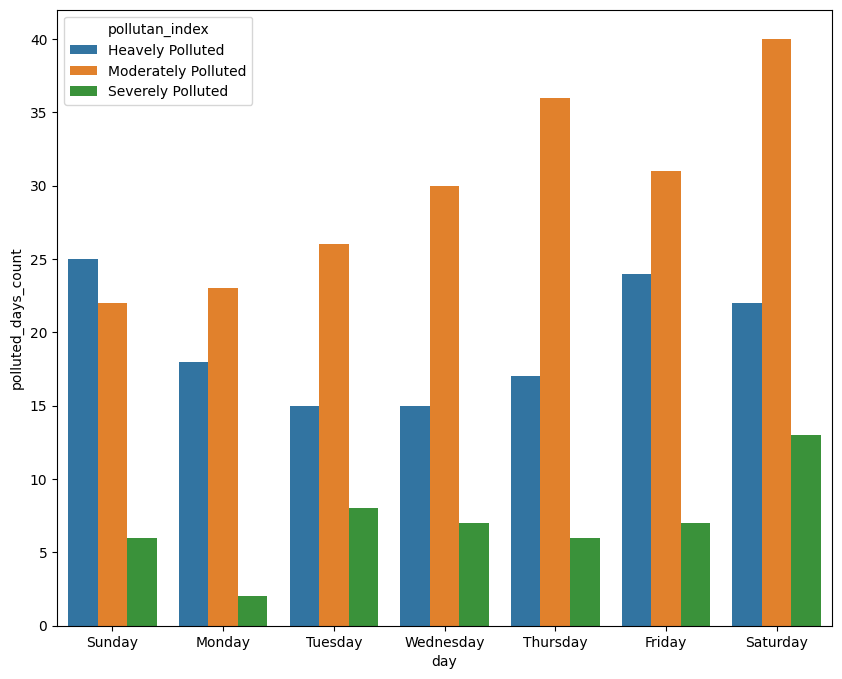

In [71]:
plt.figure(figsize=(10,8))

sns.barplot(
    x = 'day',
    y = 'polluted_days_count',
    data = weeks_fix_df,
    hue = 'pollutan_index'
)

In [78]:
weeks_fix_sum_df = weeks_fix_df.groupby(by= 'day').agg({
    'polluted_days_count' : 'sum'
}).reset_index()

C:\Users\Bayu Sukma\AppData\Local\Temp\ipykernel_13540\1848545946.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Moderately, Heavily, Severely Polluted Day Count SUM (2013 - 2017)')

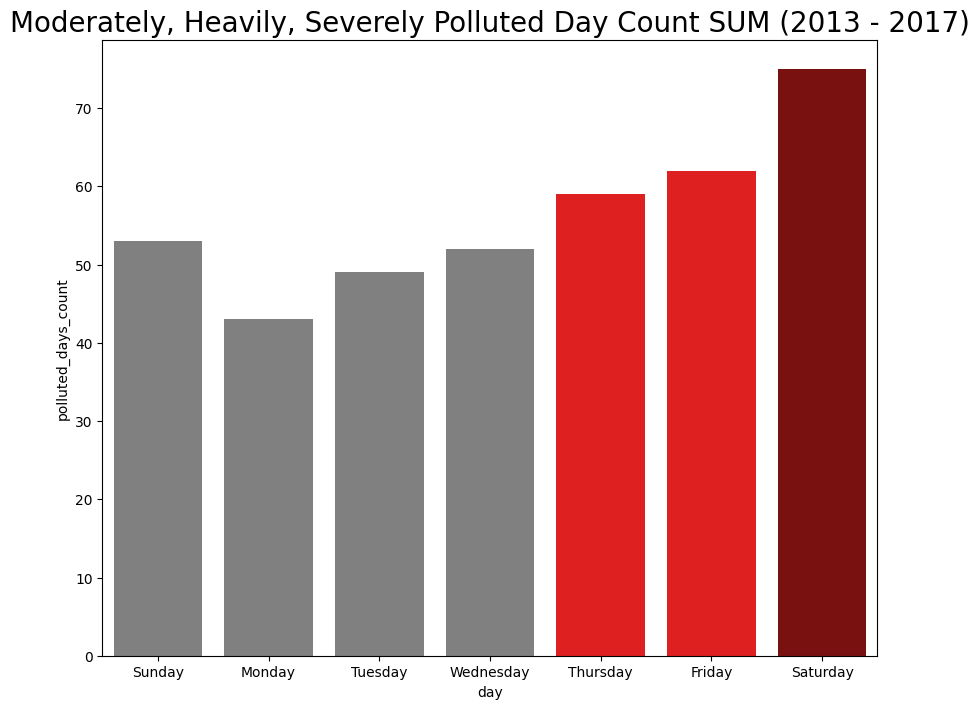

In [84]:
plt.figure(figsize=(10, 8))

warna = ['grey', 'grey', 'grey', 'grey', 'red', 'red', 'darkred']

sns.barplot(
    x = 'day',
    y = 'polluted_days_count',
    data = weeks_fix_sum_df,
    ci = None,
    palette = warna
)
plt.title('Moderately, Heavily, Severely Polluted Day Count SUM (2013 - 2017)', size = 20)

## Conclusion

- **Conclution pertanyaan 1** : Polutan apa yang paling banyak mencemari kota Beijing?\
\
Pollutan `PM2.5` dan `PM10` merupakan polutan yang paling mencemari kota beijing dari tahun 2013 sampai 2017. Tingkat polusi oleh `PM2.5` dan `PM10` sering berada pada index `'Moderately Polluted'`, `'Heavily Polluted'`, dan `'Severely Polluted'`, dan hanya kedua polutan tersebut yang berada pada indeks `'Moderately Polluted'`, `'Heavily Polluted'`, dan `'Severely Polluted'`. Dimana pada level tersebut akan sangat berbahaya untuk kesehatan.


- **Conclution pertanyaan 2** : Pada hari apa saja dalam seminggu dimana polusi udara di kota Beijing sangat tinggi?\
\
Polusi dengan tingkat (indeks/level) yang tinggi di kota Beijing sering terjadi pada hari Kamis, Jum'at, dan Sabtu. Sehingga sangat dianjurkan untuk memakai alat kesehatan seperti masker, penyaring udara, dll pada hari tersebut. Namun juga dianjurkan untuk memakai alat kesehatan tersebut setiap hari, karena pada hari lainnya pun tinggat polusi cukup tinggi.